# Exercícios

1. Altere o programa abaixo para que identifique apenas as palavras que começam com a, tenham qualquer coisa no meio, e terminem com b.

In [25]:
import re
def text_match(text):
        patterns = 'ab*?'
        if re.search(patterns,  text):
                return 'Encontrei!'
        else:
                return('Oxe!')

print(text_match("bb"))
print(text_match("a1b2"))
print(text_match("abcde"))

asdf_sdafasdf
Oxe!
sjadfl_askdf_kasjer_klansg


2. Altere a variavel patterns do código da questão 1 e escreva um programa em Python que identifique números de telefone no formato 
 * (71) 98765-4321

In [45]:
import re
def text_match(text):
        patterns = '^(\([0-9]{2}\) [0-9]{5}-[0-9]{4})$'
        if re.search(patterns,  text):
          return re.search(patterns,  text)[0]
        else:
          return('Oxe!')

print(text_match("(77)11111-1111"))
print(text_match("(7) 11111-1111"))
print(text_match("(77) 1111-1111"))
print(text_match("(77) 11111-11111"))
print(text_match("(77) 111111-1111"))
print(text_match("(777) 11111-1111"))
print(text_match("(77) 1111111111"))
print(text_match("(77) 11111-1111"))
print(text_match("(71) 99999-9999"))
print(text_match("(77) 90909-1234"))

Oxe!
Oxe!
Oxe!
Oxe!
Oxe!
Oxe!
Oxe!
Oxe!
(71) 99999-9999
(77) 90909-1234


3. Altere a variavel patterns do código da questão 1 e escreva um programa em Python que identifique CPFs no formato 
 * 123.456.789-10

In [48]:
import re
def text_match(text):
        patterns = '^([0-9]{3}.){2}[0-9]{3}-[0-9]{2}$'
        if re.search(patterns,  text):
          return re.search(patterns,  text)[0]
        else:
          return('Oxe!')

print(text_match("0121.345.678-90"))
print(text_match("012.3451.678-90"))
print(text_match("012.345.6781-90"))
print(text_match("012.345.678-901"))
print(text_match("a012.345.678-90"))
print(text_match("0123.45.678-90"))
print(text_match("012.345.678-90"))
print(text_match("111.111.111-11"))
print(text_match("111.222.333-44"))

Oxe!
Oxe!
Oxe!
Oxe!
Oxe!
Oxe!
012.345.678-90
111.111.111-11
111.222.333-44


4. Altere a variavel patterns do código da questão 1 e escreva um programa em Python que identifique palavras em que apenas a primeira letra é maiúscula.

In [50]:
import re
def text_match(text):
        patterns = '^[A-Z][a-z]*$'
        if re.search(patterns,  text):
          return re.search(patterns,  text)[0]
        else:
          return('Oxe!')

print(text_match("Gustavo"))
print(text_match("Mendel"))
print(text_match("GustavoA"))
print(text_match("FGustavo"))
print(text_match("GusAtavo"))
print(text_match("dMendel"))

Gustavo
Mendel
Oxe!
Oxe!
Oxe!
Oxe!


# Classificando Tweets sobre eleições com Expressões Regulares

* Objetivos
  * Apresentação da biblioteca re da linguagem Python
  * Classificar Tweets automaticamente utilizando expressões regulares 
  * Identificar os políticos mais comentados no Twitter

##1  - Utilize o seu BEARER_TOKEN para realizar as consultas na API do Twitter.

In [53]:
# Use o seu próprio BEARER_TOKEN
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAOJwgAEAAAAAX4zOPvwAzhJ8g%2FipQEbAk7UFZJ0%3DEokyi0E4LPKtTR6AEdEzJbVssshIgoFQanj7kI8nSkbFtIzp19'

## 2 - Defina a sua chave de busca para tweets no Tweeter. Escolha os políticos (presidente da República, governador, senador, deputado federal, deputado estadual ou deputado distrital) que você quer monitorar.

In [58]:
# Essa chave de consulta ficará em branco
query = 'bolsonaro'

In [59]:
#@title Mantenha esse código oculto
from tqdm import tqdm
import json
import csv
import requests
import pandas
import time
from requests.utils import quote
# import emoji
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def connect_to_endpoint(url, headers):
    """ Connects to API URL endpoint """
    for i in range(1, 14):
        try:
            response = requests.get(url, headers=headers)
            if response.status_code == 200:
                return response.json()
        except Exception as e:
      
            print("Connection failed, retrying...",i)
            time.sleep(5)

def json_extract(obj, key):
    """Recursively fetch values from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    values = extract(obj, arr, key)
    return values

def main(token):
    stop = False
    tweets = set()
    # for i in tqdm(range(10)):
    for i in range(10):
        print()
        headers = {"Authorization": "Bearer {}".format(bearer_token)}
        query_field = quote(query, safe='')
        
        if token == '':
          url = f'https://api.twitter.com/2/tweets/search/recent?query={query_field}'
        else:
          url = f'https://api.twitter.com/2/tweets/search/recent?query={query_field}'+'&next_token='+token

        time.sleep(3.2) # Sleep for 3 seconds
        try:
            data = connect_to_endpoint(url, headers)
        except Exception as e:
            print("Oh no!!!")
        id = json_extract(data, 'id')
        created_at = json_extract(data, 'id')
        author_id = json_extract(data, 'author_id')
        text = json_extract(data, 'text')

        
        for t in text:
            tweets.add(t)       
        
        try:
            token = json_extract(data, 'next_token')[0]
            with open(token+'.json', 'w', encoding='utf-8') as f:
                json.dump(data, f, ensure_ascii=False, indent=4, sort_keys=True)
            
            break
        except:
            token = ''
            with open('last.json', 'w', encoding='utf-8') as f:
                json.dump(data, f, ensure_ascii=False, indent=4, sort_keys=True)
            print("finished")
            stop = True

        if stop:
            break
    
    complete = list(tweets)
    return(complete,token)
    


## 3 - Sua tarefa: Defina uma expressão regular que seja capaz de identificar se um tweet é contra ou a favor do seu candidato ~do coração~ nestas eleições de 2022. Caso necessário, modifique o gráfico de pizza para melhor visualização.

A entrega desta atividade requer dois arquivos:
* O arquivo fonte do Google Colab na extensão ipynb
* A imagem do gráfico de pizza gerada após a execução do seu código

RT @ValterL31673442: Você percebe o que é propósito e o que é conveniência. Os apoiadores do Lula falam dele como um criminoso e depois o a…


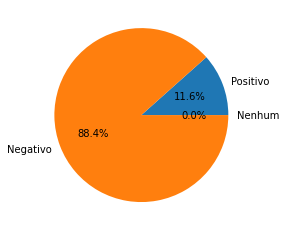

In [69]:
from IPython.display import display, clear_output

if __name__ == '__main__':
  
  # Faz uma coleta inicial de Tweets
  token = ''

  # Geracao de Graficos
  y = np.array([0, 0, 0])
  labels = ["Positivo", "Negativo", "Nenhum"]

  # Realiza 5 buscas no Twitter, altere essa quantidade como desejar
  buscas = 100
  for i in range(buscas):
    # Utiliza token para continuar buscando Tweets do último ponto de retorno
    tweets,token = main(token)  
    for t in tweets:
      plt.pause(0.5)
      plt.clf() 
      clear_output(wait=True)
      print(t)

      # Crie suas expressões regulares aqui!!!
      positivo = re.search("alta|empregos|inflação|melhor|acima de tudo",t,re.IGNORECASE)
      negativo = re.search("cortes|cortou|educação|inimigo|piores|corrupção|confiscou",t,re.IGNORECASE)
      nenhum = re.search("",t,re.IGNORECASE)

      if negativo:
        y[1] = y[1]+1
      elif positivo:
        y[0] = y[0]+1
      
      plt.pie(y, labels = labels,autopct='%1.1f%%')
      plt.show()

    if token == '':
      break
    
